# Libraries

In [279]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import warnings
from IPython.display import Markdown as md
import seaborn as sb
import missingno as msno


warnings.filterwarnings('ignore')
# set to show all columns
pd.set_option('display.max_columns', 55)

# Declarations

In [280]:
def plot_var(var='positive'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df[var]
    x = df['date']
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.plot(x,y,color='navy')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

def plot_hist(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df[var]
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.hist(y,color='royalblue')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

def add_sevenday_newCases(df):

    df['sevenDayAvg_newCases'] = 'NA'

    for i in range(0, len(df['positiveIncrease'])):
        if i < 7:
            df['sevenDayAvg_newCases'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['positiveIncrease'][i-y])
            df['sevenDayAvg_newCases'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for hospitalization
def add_sevenday_hospitalize(df):

    df['sevenDayAvg_hospitalize'] = 'NA'

    for i in range(0, len(df['hospitalizedIncrease'])):
        if i < 7:
            df['sevenDayAvg_hospitalize'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['hospitalizedIncrease'][i-y])
            df['sevenDayAvg_hospitalize'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Death
def add_sevenday_death(df):

    df['sevenDayAvg_death'] = 'NA'

    for i in range(0, len(df['deathIncrease'])):
        if i < 7:
            df['sevenDayAvg_death'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['deathIncrease'][i-y])
            df['sevenDayAvg_death'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Test Result
def add_sevenday_testResult(df):

    df['sevenDayAvg_testResult'] = 'NA'

    for i in range(0, len(df['totalTestResultsIncrease'])):
        if i < 7:
            df['sevenDayAvg_testResult'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['totalTestResultsIncrease'][i-y])
            df['sevenDayAvg_testResult'][i] = round(sum(weekly) / 7)
    return df

# Import Data

In [281]:
# API Hosting Suppose to End 5/1/2021
url="https://api.covidtracking.com/v1/states/ny/daily.cs" # API Call for NY data

try:
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))

    if df.values.size < 3:  # ensure DF has values (may just contain 2 error values)
        raise FileNotFoundError("No data in API")
    else:
        df.to_csv('ny_covid_data.csv', index=False)  # future proof in case api goes down
        df = pd.read_csv(io.StringIO(s.decode('utf-8')))

except FileNotFoundError as fnf_error:
    df = pd.read_csv("ny_covid_data.csv")  # read from most recently fetched data
except: # catch any other unexpected error
    df = pd.read_csv("ny_covid_data.csv")

# Data Transformation

In [282]:
# Format dates
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d') 

# Impute NaN values
# df.fillna(value=-1, inplace=True)

# apply filter on date
df = df[df['date'] <= '2020-06-30']
# df = df[df['date'] <= '2020-12-30']


# Datasource 2 (CDC)

In [1]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import datetime


response=request(url='https://data.cdc.gov/id/vbim-akqf.json?current_status=Laboratory-confirmed%20case', method='get')
covid_records_cdc = response.json()
df = pd.DataFrame(covid_records_cdc)
format_dt = '%Y-%m-%dT%H:%M:%S.%f'
format_dt2 = '%Y-%m-%d'
# Format dates
pd.to_datetime(df['cdc_case_earliest_dt'], format=format_dt)
pd.to_datetime(df['cdc_report_dt'], format=format_dt)
pd.to_datetime(df['pos_spec_dt'], format=format_dt)
df['cdc_case_earliest_dt']=pd.to_datetime(df['cdc_case_earliest_dt'], format=format_dt2)
df['cdc_report_dt']=pd.to_datetime(df['cdc_report_dt'], format=format_dt2)
df['pos_spec_dt']=pd.to_datetime(df['pos_spec_dt'], format=format_dt2)
df.head()


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,onset_dt
0,2020-01-01,2021-01-31,2020-01-01,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,No,Missing,NaN
1,2020-01-01,2021-02-02,2020-01-01,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,NaN
2,2020-01-02,2021-01-27,2020-01-02,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,NaN
3,2020-01-02,2021-02-02,2020-01-02,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,NaN
4,2021-01-01,2020-01-03,2020-01-03,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Missing,No,Yes,2021-01-01T00:00:00.000


In [ ]:
Result: Since the data source doesn't provide the location of the patient, we won't be able to use it for our current analysis

# EDA

## Missing Data

There are columns that don't have a significant impact to our analysis, namely date checked and date modified features. These columns we want to exclude.

In [283]:
df.drop(['dateChecked', 'dateModified'],axis=1,inplace=True)

We set a threshold of to tolerate up to 90% of values being NA per column. If a column contains more than 90% of NA values we drop it.

In [284]:
df.info
limitPer = len(df) * .90
df = df.dropna(thresh=limitPer, axis=1)


There are also many features that just have zeros in them, we want to exclude that in our set as well.

In [285]:
df = df.loc[:, (df != 0).any(axis=0)]

We ended up excluding 20 columns that just contained NA values, 2 columns that didn't have significant information (date modified and date checked), and 6 columns that only contained zeros.

## Feature Plots
In this first plot we can see the daily number of positive cases in NY from March 2020 - June 30, 2020:

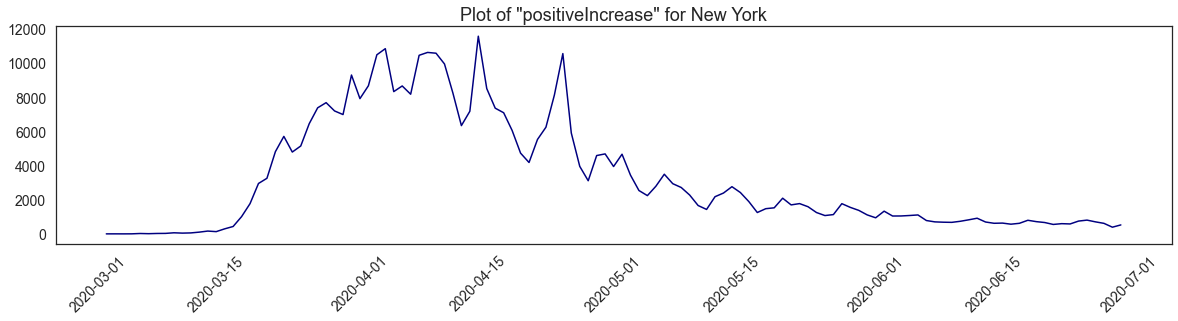

In total there were 393,454 positive cases in New York during that time range.

In [286]:
plot_var('positiveIncrease')

totalCases = "{:,.0f}".format(df['positiveIncrease'].sum())

md(f"In total there were {totalCases} positive cases in New York during that time range.")
# df.tail(n = 5)

The following plots also show the increases in hospitalizations, deaths, and the total amount of test results.

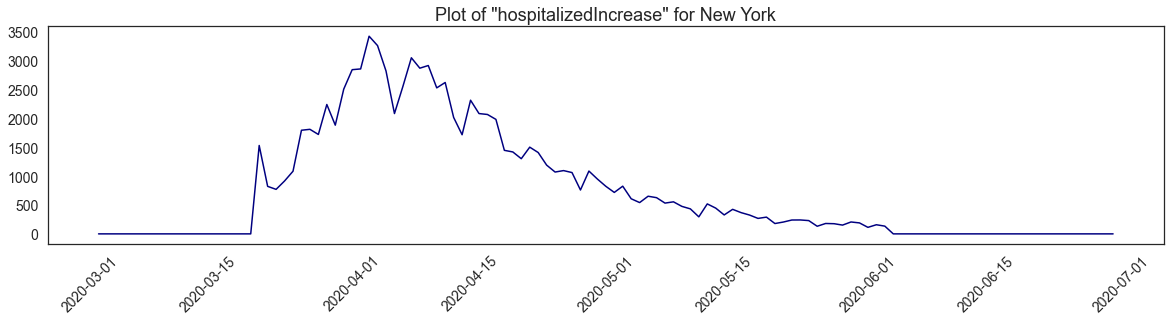

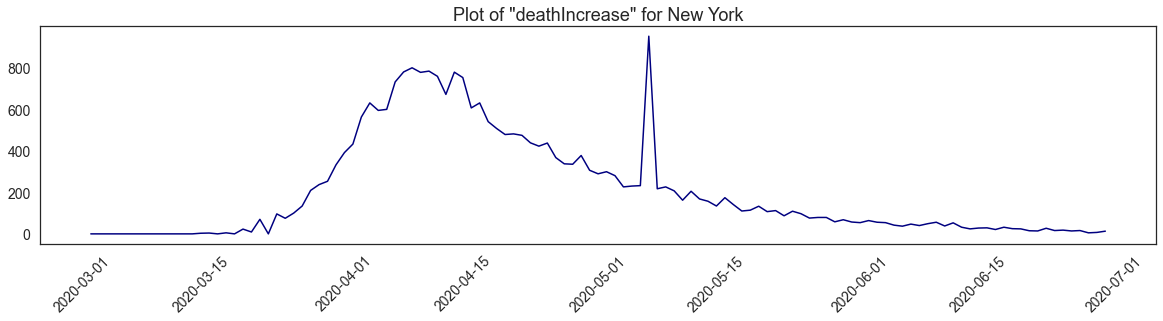

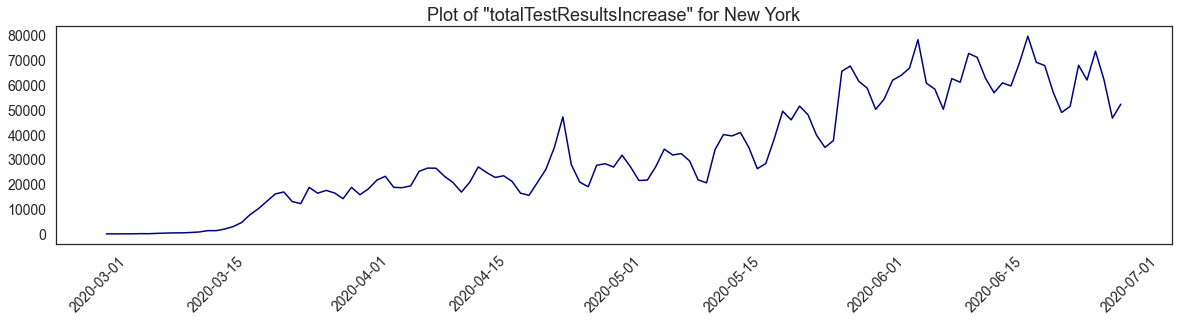

In [287]:
plot_var('hospitalizedIncrease')

plot_var('deathIncrease')

plot_var('totalTestResultsIncrease')



In [288]:
pd.set_option('display.max_columns', 56)

# 7 days moving average for positiveIncrease
df.sort_values(by=['date'], inplace=True, ascending=True)

# reset index
df.reset_index(level=0, inplace=True)

## Plots on 7-Day Moving Averages

In [289]:
add_sevenday_newCases(df)
add_sevenday_hospitalize(df)
add_sevenday_death(df)
add_sevenday_testResult(df)

,index,date,state,positive,totalTestResultsSource,totalTestResults,lastUpdateEt,checkTimeEt,totalTestEncountersViral,fips,positiveIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,sevenDayAvg_newCases,sevenDayAvg_hospitalize,sevenDayAvg_death,sevenDayAvg_testResult
0,369,2020-03-02,NY,0,totalTestEncountersViral,0,NaN,NaN,0,36,0,0,0,0,0,0,b348e3592c0b30cb944b37ddbc88044ceeeadfc9,0,0,0,0
1,368,2020-03-03,NY,1,totalTestEncountersViral,1,NaN,NaN,1,36,1,1,1,1,0,0,9e3daed71a696c0c3fa30150ee6423a0a94de8f5,0,0,0,0
2,367,2020-03-04,NY,1,totalTestEncountersViral,10,NaN,NaN,10,36,0,25,9,1,0,0,3feb3bdb879194f81d11c8bbf994d8e3ea2a5252,0,0,0,0
3,366,2020-03-05,NY,3,totalTestEncountersViral,30,NaN,NaN,30,36,2,27,20,3,0,0,04e82e80db72556a73999ead493c993e90b8969e,0,0,0,0
4,365,2020-03-06,NY,25,totalTestEncountersViral,122,NaN,NaN,122,36,22,261,92,25,0,0,9e99ccc04e6d33397cc412ee1b0fbecddbaeecd8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,253,2020-06-26,NY,391220,totalTestEncountersViral,3681317,6/25/2020 23:59,06/25 19:59,3681317,36,805,391220,61723,391220,14,0,0415ca28a21a379fdec8a1a34f7bf57b53a7b511,666,0,18,60336
117,252,2020-06-27,NY,391923,totalTestEncountersViral,3754579,6/26/2020 23:59,06/26 19:59,3754579,36,703,391923,73262,391923,16,0,49d082c4525827acb47baf3905154b915f46e62d,664,0,17,60969
118,251,2020-06-28,NY,392539,totalTestEncountersViral,3816485,6/27/2020 23:59,06/27 19:59,3816485,36,616,392539,61906,392539,5,0,c6b2f6c762a5771b69bd2b3a1799ddd8dc4733e2,658,0,16,60167
119,250,2020-06-29,NY,392930,totalTestEncountersViral,3862913,6/28/2020 23:59,06/28 19:59,3862913,36,391,392930,46428,392930,7,0,51bb925b19c9907d34d959bc544eb501ad200318,635,0,15,58688


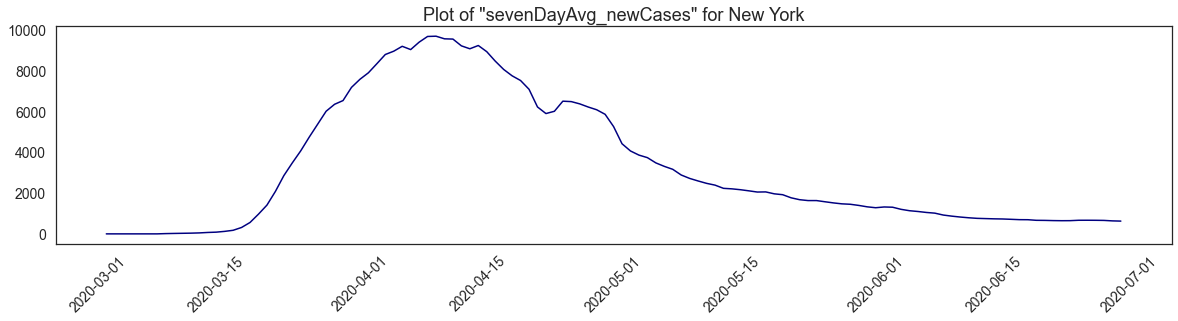

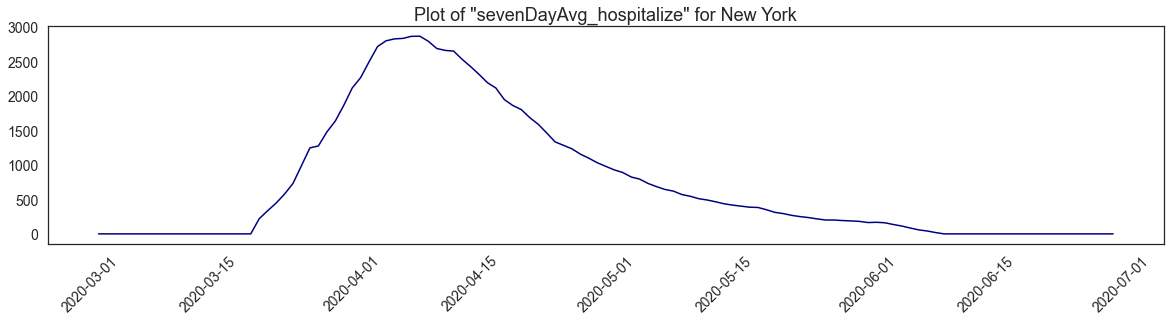

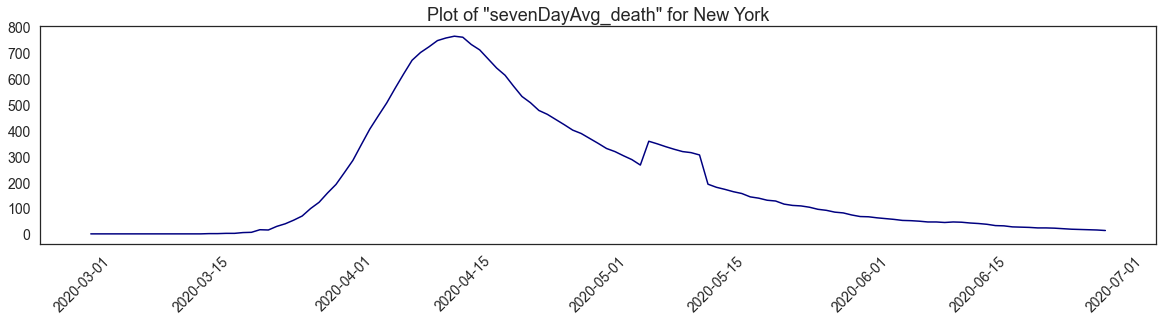

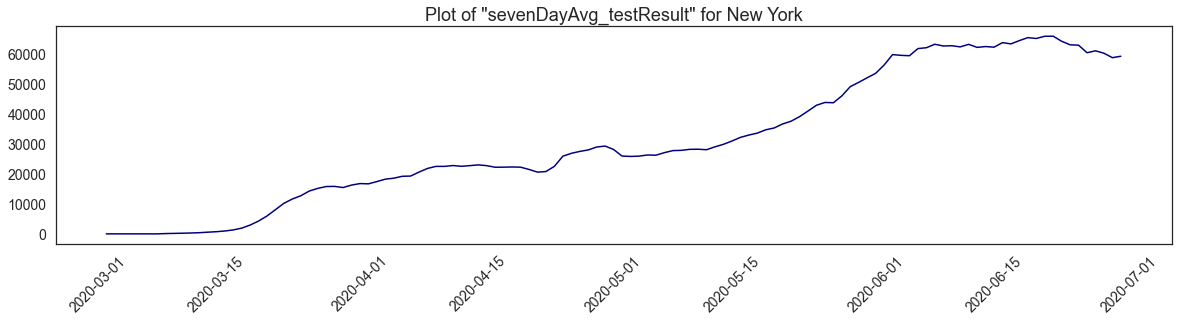

In [290]:
plot_var('sevenDayAvg_newCases')
plot_var('sevenDayAvg_hospitalize')
plot_var('sevenDayAvg_death')
plot_var('sevenDayAvg_testResult')

## Histogram Plots

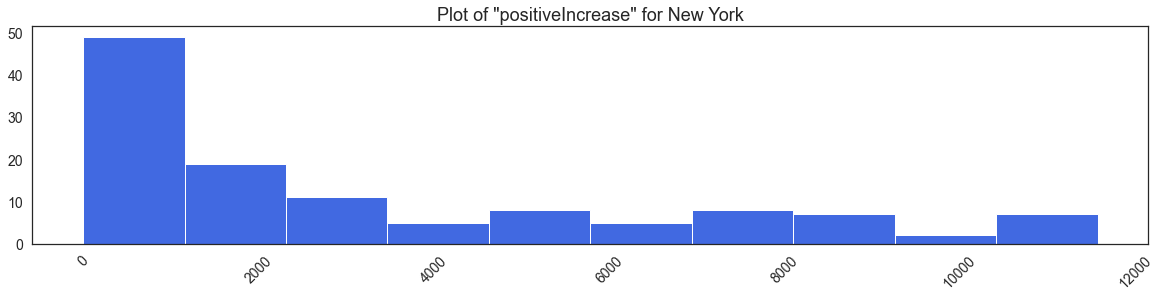

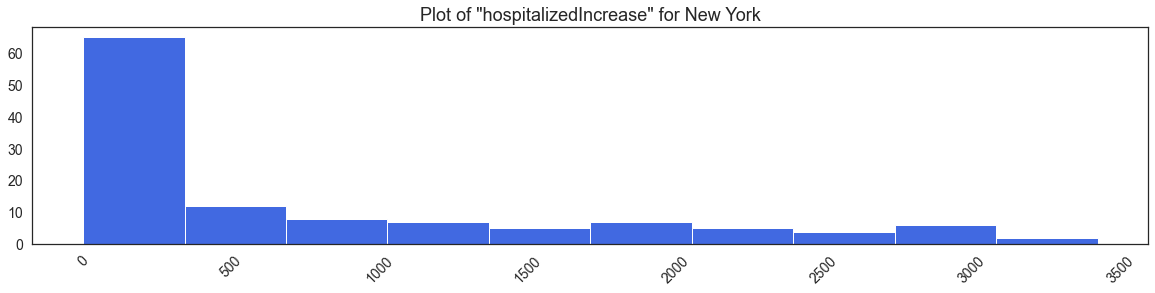

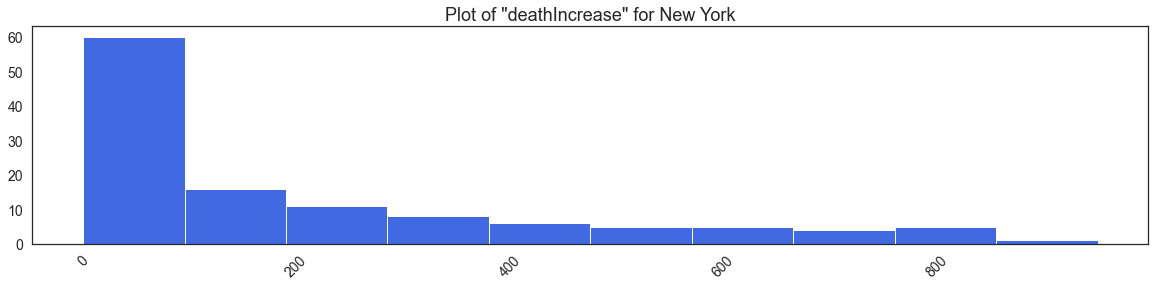

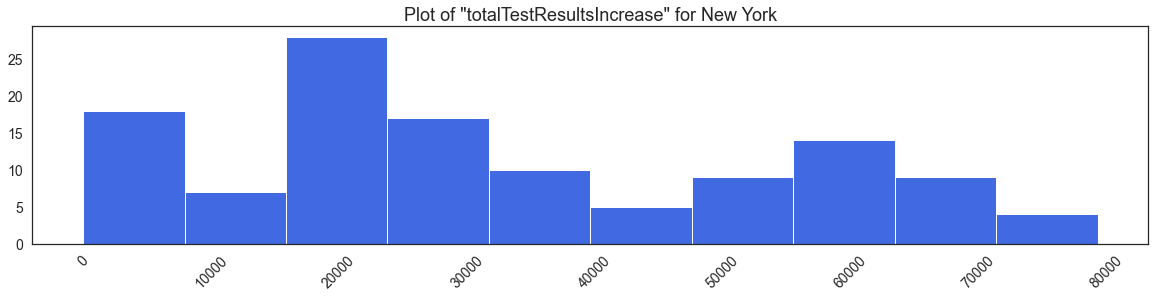

In [291]:
plot_hist('positiveIncrease')

plot_hist('hospitalizedIncrease')

plot_hist('deathIncrease')

plot_hist('totalTestResultsIncrease')




## Correlation Matrix

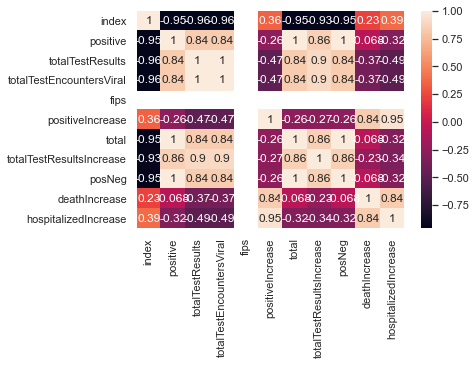

In [292]:
corrMatrix = df.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

It's plain to see that death increases are positively correlated with hospitalizations and positive cases. It would also make sense that there would exist a negative correlations between deaths and total tests done, as the more informed the population is the better course of action they can take based on their status results.

## Final State of data

In [293]:
df.info

<bound method DataFrame.info of      index       date state  positive    totalTestResultsSource  \
0      369 2020-03-02    NY         0  totalTestEncountersViral   
1      368 2020-03-03    NY         1  totalTestEncountersViral   
2      367 2020-03-04    NY         1  totalTestEncountersViral   
3      366 2020-03-05    NY         3  totalTestEncountersViral   
4      365 2020-03-06    NY        25  totalTestEncountersViral   
..     ...        ...   ...       ...                       ...   
116    253 2020-06-26    NY    391220  totalTestEncountersViral   
117    252 2020-06-27    NY    391923  totalTestEncountersViral   
118    251 2020-06-28    NY    392539  totalTestEncountersViral   
119    250 2020-06-29    NY    392930  totalTestEncountersViral   
120    249 2020-06-30    NY    393454  totalTestEncountersViral   

     totalTestResults     lastUpdateEt  checkTimeEt  totalTestEncountersViral  \
0                   0              NaN          NaN                         0   
1